In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Theory

- **Definition 51.1 (Variance Function)**: The variance function $V(t)$ of a random process $\{ X(t) \}$ is a function that specifies the variance of the process at each time $t$. Similar definition to the mean function
    - $V(t) = Var[X(t)]$ for continuous time
    - $V[n] = Var[X[n]]$ for discrete time

- Intuitively, imagine I generate a random process using the function $X(t)$ many times. The mean function will tell me what the average value is at that time $t$, and the variance function tells me how spread out the values can be across multiple instantiations of $X(t)$ at time $t$

## Examples

### Examples 51.1 (Random Amplitude Process)

- Consider the random amplitude process $X(t) = A \cos(2 \pi ft)$ introduced in example 48.1. Let's suppose $A \sim \text{Binomial}(n=5, p=0.5)$, and $f=1$
    - Note that, for a given value of $t$, the only random variable is $A$

- Computing the variance function:
    - $$\begin{align}
        V(t) &= Var[X(t)] \\
        &= Var[A \cos (2 \pi f t)] \\
        &= Var[A] \cos^2(2 \pi f t) & \text{Taking out the constant term} \\
        &= (n \cdot p \cdot (1-p)) \cos^2(2 \pi f t) \\
        &= 1.25 \cos^2(2 \pi f t) \\
        \end{align}$$

- You can think of the variance as a "band" around the mean function
    - To make sure the units of the band matches the unit of the mean function, we shade the 1 standard deviation above and below the mean function

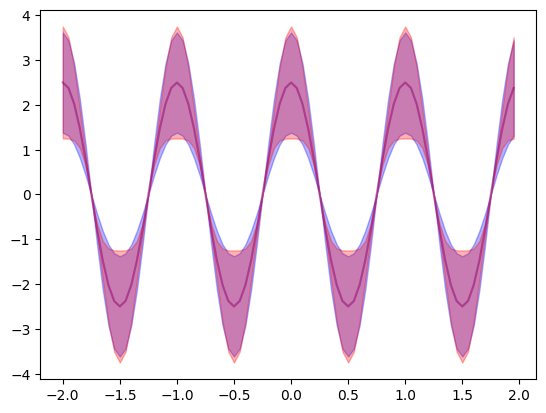

In [28]:
Avals = np.random.binomial(n=5, p=0.5, size=10_000)
tvals = np.arange(-2,2,0.05)

instantiations = np.array([a * np.cos(2 * np.pi * tvals) for a in Avals])
simulated_mean_func = np.mean(instantiations, axis=0)
simulated_sd_func = np.std(instantiations, axis=0)

computed_mean_func = 2.5 * np.cos(2 * np.pi * tvals)
computed_sd_func = 1.25 * np.cos(2 * np.pi * tvals)**2

# plt.subplot(121)
plt.plot(tvals, simulated_mean_func, alpha=0.3, color='blue')
plt.fill_between(tvals, simulated_mean_func-simulated_sd_func, simulated_mean_func+simulated_sd_func, alpha=0.3, color='blue')

plt.plot(tvals, computed_mean_func, alpha=0.3, color='red')
plt.fill_between(tvals, computed_mean_func-computed_sd_func, computed_mean_func+computed_sd_func, alpha=0.3, color='red')

### Example 51.2 (Poisson Process)

- Consider the Poisson process $\{ N(t); t \ge 0 \}$ of rate $\lambda$ defined in example 47.1. Recall that $N(t)$ represents the number of arrivals on the interval $(0,t)$, which (by properties of the Poisson process) follows a $\text{Poisson}(\mu=\lambda t)$ distribution. 
    - Since the variance of a $\text{Poisson}(\lambda)$ variable is $\lambda$, $V(t) = Var[N(t)] = \lambda \cdot t$

- Let's represent the variance function of the Poisson process as a band around its mean function
    - Again, we want to use $\sqrt{V(t)} = SD(t)$ so that the unit of the width matches the unit of the mean function

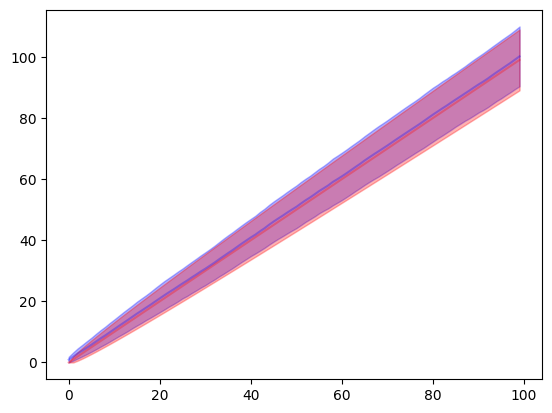

In [40]:
LAM = 1

instantiations = np.array([np.random.poisson(lam=LAM, size=100).cumsum() for _ in range(500)])
simulated_mean_func = np.mean(instantiations, axis=0)
simulated_std_func = np.std(instantiations, axis=0)

computed_mean_func = LAM * np.arange(0,100,1)
computed_std_func = np.sqrt(LAM * np.arange(0,100,1))

plt.plot(np.arange(0,100,1), simulated_mean_func, alpha=0.3, color='blue')
plt.fill_between(np.arange(0,100,1), simulated_mean_func-simulated_std_func, simulated_mean_func+simulated_std_func, alpha=0.3, color='blue')

plt.plot(np.arange(0,100,1), computed_mean_func, alpha=0.3, color='red')
plt.fill_between(np.arange(0,100,1), computed_mean_func-computed_std_func, computed_mean_func+computed_std_func, alpha=0.3, color='red')

### Example 51.3 (White Noise)

- Consider the white noise process $\{ Z[n] \}$ defined in example 47.2, which is simply IID random variables. 
    - That is, $X[n] = Z[n]$, where $Z[n] \sim \text{some i.i.d process}$
    - Let the variance of these random variables be $\sigma^2 = Var[Z[n]]$. 
    - Since the variables are IID, the variance of the process does not depend on time
    - $V[n] = Var[Z[n]] = \sigma^2$

- Let's visualise for the case where $Z[n] \sim \text{Normal}(\mu=0, \sigma=1)$

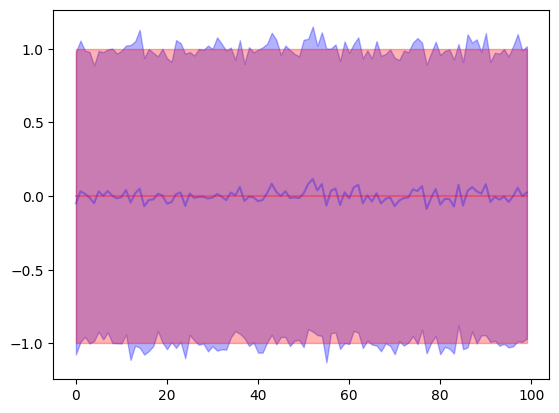

In [41]:
MU = 0
SIGMA = 1

instantiations = np.array([np.random.normal(MU, SIGMA, size=100) for _ in range(500)])
simulated_mean_func = np.mean(instantiations, axis=0)
simulated_std_func = np.std(instantiations, axis=0)

computed_mean_func = np.repeat(0, 100)
computed_std_func = np.repeat(np.sqrt(1), 100)

plt.plot(np.arange(100), simulated_mean_func, alpha=0.3, color='blue')
plt.fill_between(np.arange(100), simulated_mean_func-simulated_std_func, simulated_mean_func+simulated_std_func,alpha=0.3, color='blue')

plt.plot(np.arange(100), computed_mean_func, alpha=0.3, color='red')
plt.fill_between(np.arange(100), computed_mean_func-computed_std_func, computed_mean_func+computed_std_func,alpha=0.3, color='red')

### Example 51.4 (Random Walk)

- Consider the random walk process $\{ X[n]; n \ge 0 \}$ from example 47.3. Recall that random walk means that $$X[n] = X[n-1] + Z[n] = X[n-2] + Z[n-1] + Z[n] = Z[0] + ... Z[n]$$ So the variance function is $$\begin{align} V[n] &= Var[X[n]] \\ &= Cov[X[n], X[n]] \\ &= Cov[Z[1]+ ... Z[n], Z[1]+ ... Z[n]] \\ &= Var[Z[1]] + Var[Z[2]] + ... Var[Z[n]] \\ &= n \cdot Var[Z[1]] \end{align}$$

- Simulating when $Z[n] \sim \text{Normal}(\mu=0, \sigma=1)$
    - The variance function is $\sqrt{1 * n}$

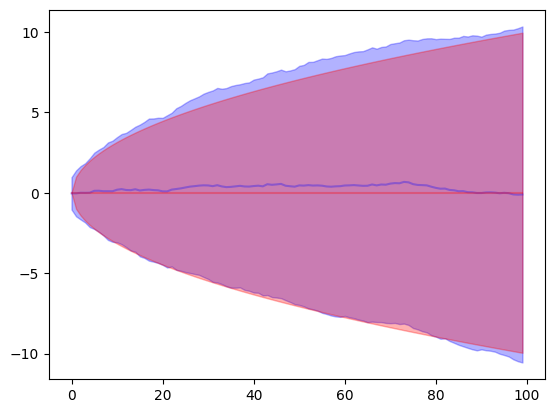

In [45]:
instantiations = np.array([np.random.normal(loc=0, scale=1, size=100).cumsum() for _ in range(500)])
simulated_mean_func = np.mean(instantiations, axis=0)
simulated_sd_func = np.std(instantiations, axis=0)

computed_mean_func = np.repeat(0, 100)
computed_sd_func = np.sqrt(np.repeat(1, 100) * np.arange(0,100,1))

plt.plot(np.arange(0,100,1), simulated_mean_func, alpha=0.3, color='blue')
plt.fill_between(np.arange(0,100,1), simulated_mean_func-simulated_sd_func, simulated_mean_func+simulated_sd_func, alpha=0.3, color='blue')

plt.plot(np.arange(0,100,1), computed_mean_func, alpha=0.3, color='red')
plt.fill_between(np.arange(0,100,1), computed_mean_func-computed_sd_func, computed_mean_func+computed_sd_func, alpha=0.3, color='red')